# Evaluation

In [1]:
# Imports 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

import joblib
import pandas as pd

In [2]:
# Load data
data_loader = DataLoader()
X_train, y_train  = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (177576, 21)
y_train shape: (177576,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [3]:
# NOTE/TODO: so far I think we still use different scorings for the cross validation. we need to run all on the same (f1?) and then compare again

In [ ]:
# logistic regression
lr_model_filename = (
    "../models/logistic_regression/lr_model_sampling_f1_20241126_104401.pkl"
)
logistic_regression = joblib.load(lr_model_filename)

# naive bayes

# support vector machine
svm_model_filename = "../models/support_vector_machine/svm_model__with-probability_full-data__20241127_155642.pkl"
svm = joblib.load(svm_model_filename)


# decision tree

# knn
knn_filename = "../models/knn/best_20241127_201059.pkl"
knn = joblib.load(knn_filename)

# Nearest Centroid
nc_filename = "../models/nearest_centroid/best_20241127_201059.pkl"
nc = joblib.load(nc_filename)

# baselines
bl_model_filename = "../models/baseline/bl_model_majority20241126_120730.pkl"
bl_majority = joblib.load(bl_model_filename)

bl_model_strat_filename = "../models/baseline/bl_model_majority20241126_120730.pkl"
bl_stratified = joblib.load(bl_model_strat_filename)


# all models
model_dict = {
    "Baseline Majority": bl_majority,
    "Baseline Stratified": bl_stratified,
    "Logistic Regression": logistic_regression,
    "Support Vector Machine": svm,
    "K-Nearest Neighbors": knn,
    "Nearest Centroid": nc,
    # Add other models here
}

/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Metrics

In [5]:
# Evaluate the model's performance on the test set
for model_name, model in model_dict.items():
    y_test = y_test
    X_test = X_test
    y_test_pred = model.predict(X_test)

    report = classification_report(y_test, y_test_pred, digits=4)
    print(f"\n=== Model: {model_name} ===\n")
    print("Classification Report:\n", report)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy:.4f}")
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp) # this is basically just the recall of the negative class
    print(f"Specificity: {specificity:.4f}") 
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:\n", cm)

/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie50


=== Model: Baseline Majority ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8424    1.0000    0.9145     42314
         1.0     0.0000    0.0000    0.0000      7915

    accuracy                         0.8424     50229
   macro avg     0.4212    0.5000    0.4572     50229
weighted avg     0.7097    0.8424    0.7704     50229

Accuracy: 0.8424
Specificity: 1.0000

Confusion Matrix:
 [[42314     0]
 [ 7915     0]]

=== Model: Baseline Stratified ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8424    1.0000    0.9145     42314
         1.0     0.0000    0.0000    0.0000      7915

    accuracy                         0.8424     50229
   macro avg     0.4212    0.5000    0.4572     50229
weighted avg     0.7097    0.8424    0.7704     50229

Accuracy: 0.8424
Specificity: 1.0000

Confusion Matrix:
 [[42314     0]
 [ 7915     0]]

=== Model: Logistic Regression ===

Classificatio

In [6]:
metrics_df = pd.DataFrame(columns=[
    'Model', 
    'Accuracy', 
    'Overall_Precision', 
    'Overall_Recall', 
    'Overall_F1',
    'Precision_Negative',
    'Precision_Positive',
    'Specificity',
    'Recall_Negative', 
    'Recall_Positive', 
    'F1-Score_Negative', 
    'F1-Score_Positive', 
])

metrics_list = []  # Temporary list to store rows before creating the final DataFrame

for model_name, model in model_dict.items():
    y_test_pred = model.predict(X_test)
    report = classification_report(y_test, y_test_pred, digits=4, output_dict=True)
    accuracy = accuracy_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp)  # Specificity calculation
    
    # Metrics for the negative class ('0.0')
    precision_negative = report['0.0']['precision']
    recall_negative = report['0.0']['recall']
    f1_score_negative = report['0.0']['f1-score']
    
    # Metrics for the positive class ('1.0')
    precision_positive = report['1.0']['precision']
    recall_positive = report['1.0']['recall']
    f1_score_positive = report['1.0']['f1-score']
    
    # Overall metrics (from 'weighted avg')
    overall_precision = report['weighted avg']['precision']
    overall_recall = report['weighted avg']['recall']
    overall_f1 = report['weighted avg']['f1-score']
    
    # Append metrics as a dictionary to the list
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Overall_Precision': overall_precision,
        'Overall_Recall': overall_recall,
        'Overall_F1': overall_f1,
        'Precision_Negative': precision_negative,
        'Precision_Positive': precision_positive,
        'Specificity': specificity,
        'Recall_Negative': recall_negative,
        'Recall_Positive': recall_positive,
        'F1-Score_Negative': f1_score_negative,
        'F1-Score_Positive': f1_score_positive,

    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Round all numeric values to 4 decimal places
metrics_df = metrics_df.round(4)

metrics_df


/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie50

,Model,Accuracy,Overall_Precision,Overall_Recall,Overall_F1,Precision_Negative,Precision_Positive,Specificity,Recall_Negative,Recall_Positive,F1-Score_Negative,F1-Score_Positive
0,Baseline Majority,0.8424,0.7097,0.8424,0.7704,0.8424,0.0000,1.0000,1.0000,0.0000,0.9145,0.0000
1,Baseline Stratified,0.8424,0.7097,0.8424,0.7704,0.8424,0.0000,1.0000,1.0000,0.0000,0.9145,0.0000
2,Logistic Regression,0.7285,0.8479,0.7285,0.7628,0.9429,0.3398,0.7214,0.7214,0.7666,0.8174,0.4709
3,Support Vector Machine,0.5356,0.8412,0.5356,0.5905,0.9542,0.2372,0.4714,0.4714,0.8790,0.6310,0.3736
4,K-Nearest Neighbors,0.6863,0.8346,0.6863,0.7278,0.9344,0.3006,0.6750,0.6750,0.7468,0.7838,0.4286
5,Nearest Centroid,0.6902,0.8374,0.6902,0.7312,0.9370,0.3051,0.6779,0.6779,0.7562,0.7866,0.4348


## Confusion Matrix Plot

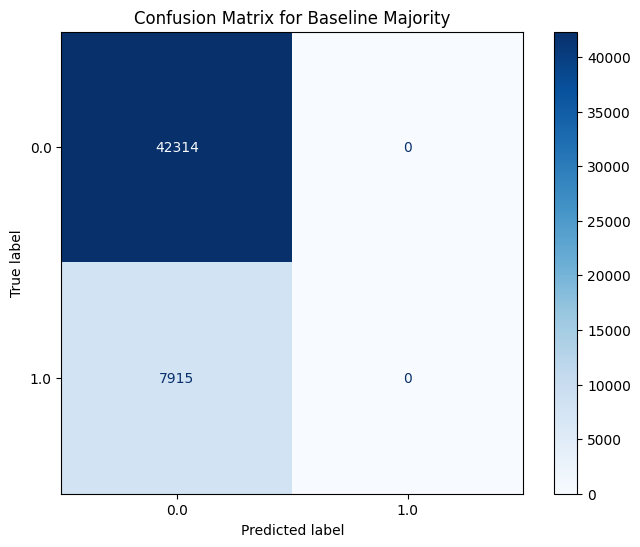

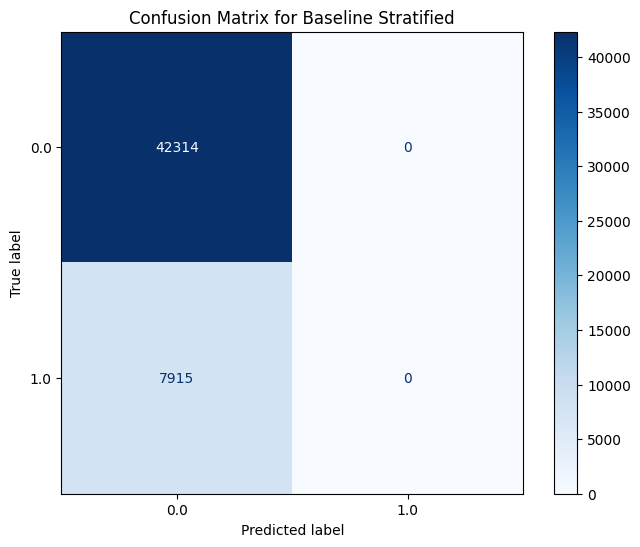

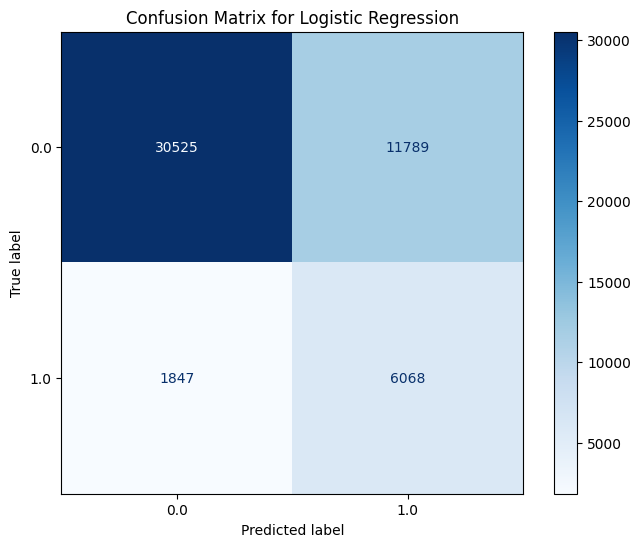

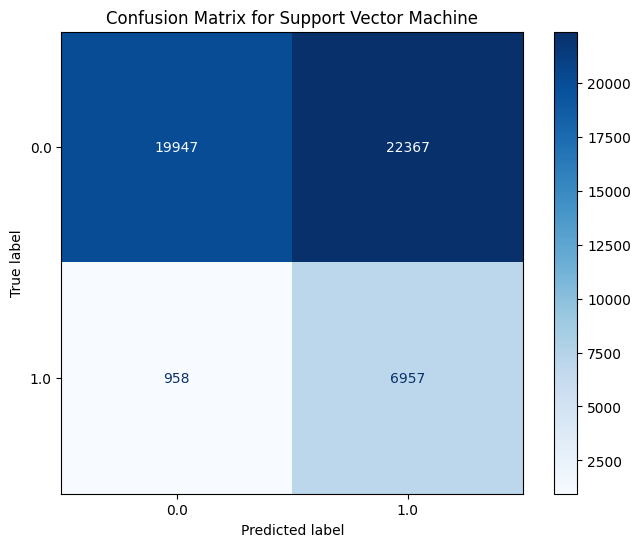

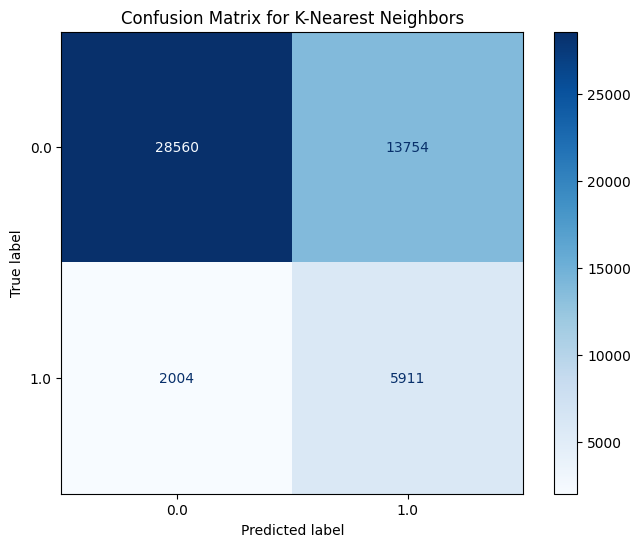

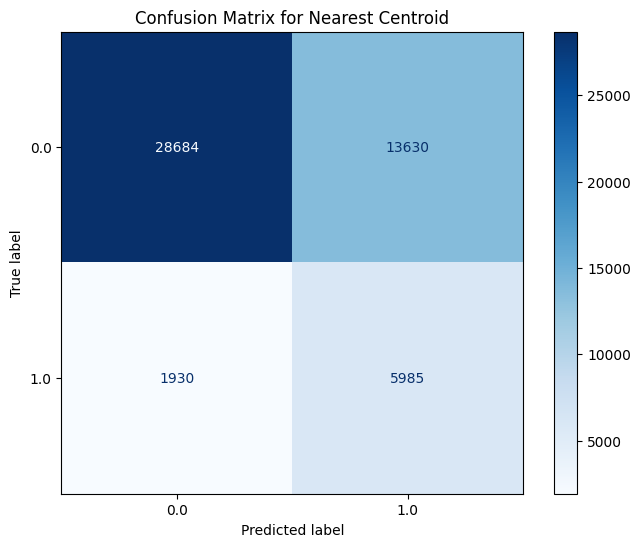

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model's performance on the test set
for model_name, model in model_dict.items():
    y_test = y_test
    X_test = X_test
    y_test_pred = model.predict(X_test)
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

## Precision Recall Curve

### precision_recall_curve with predicted values

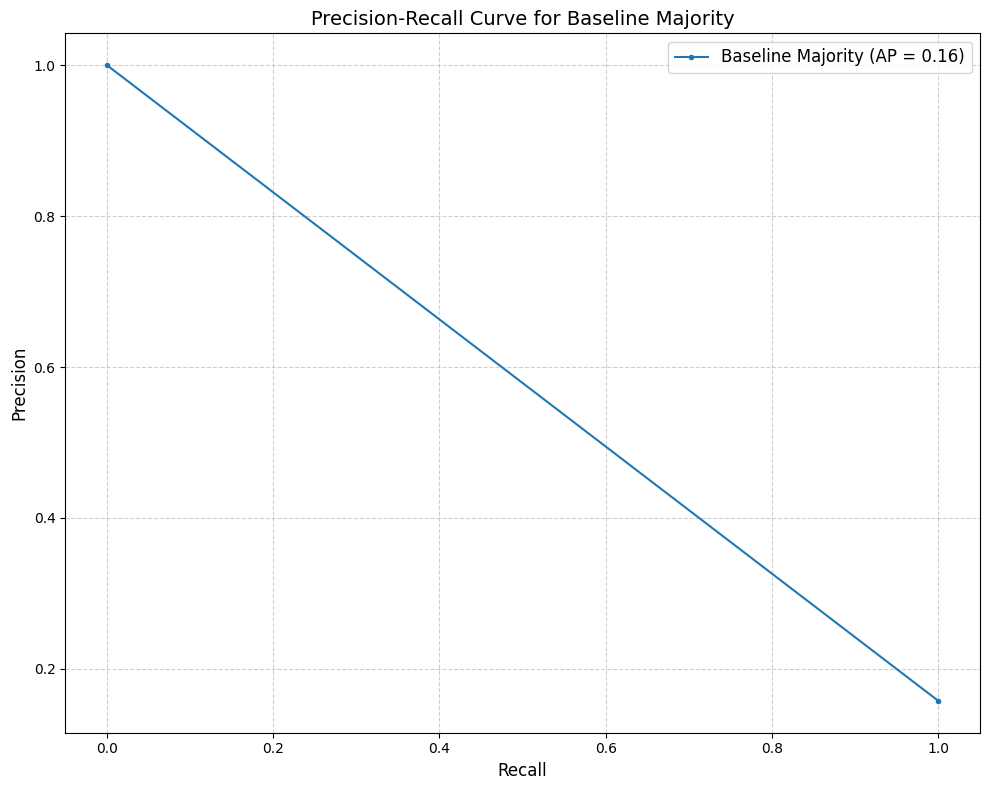

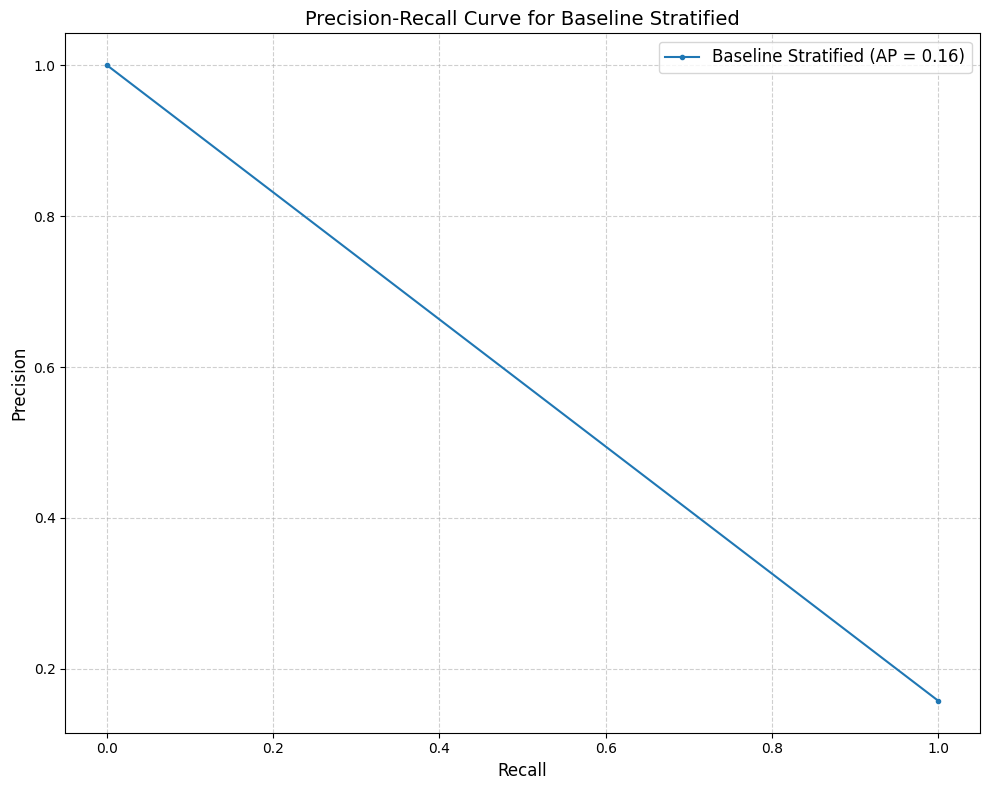

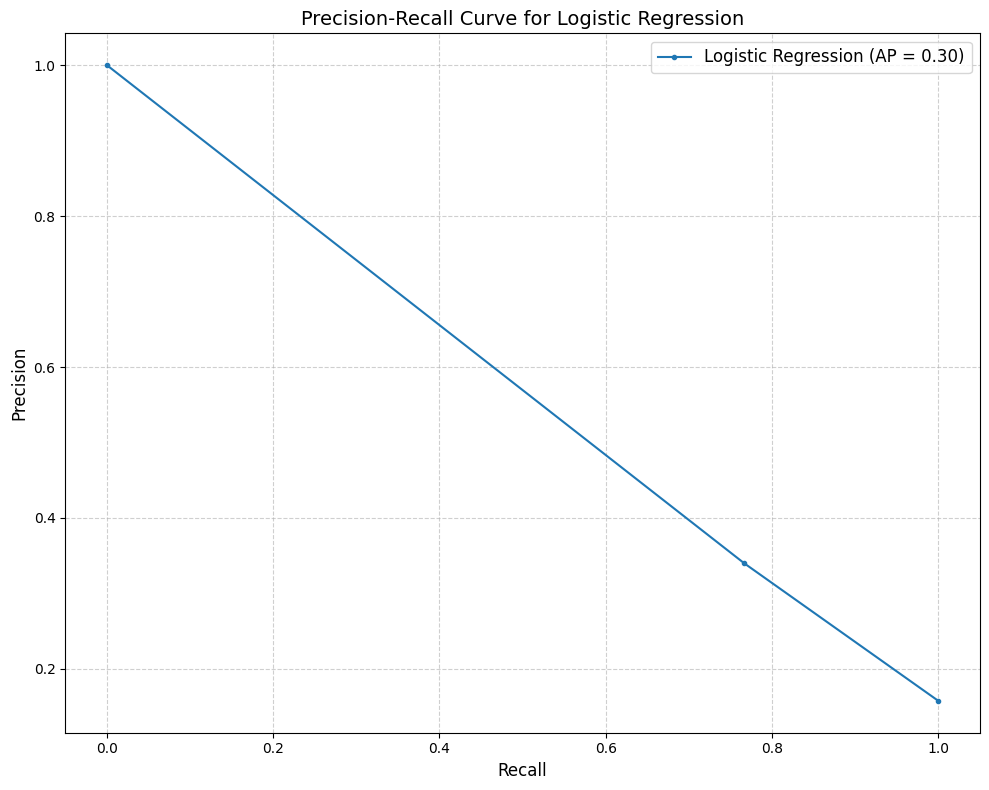

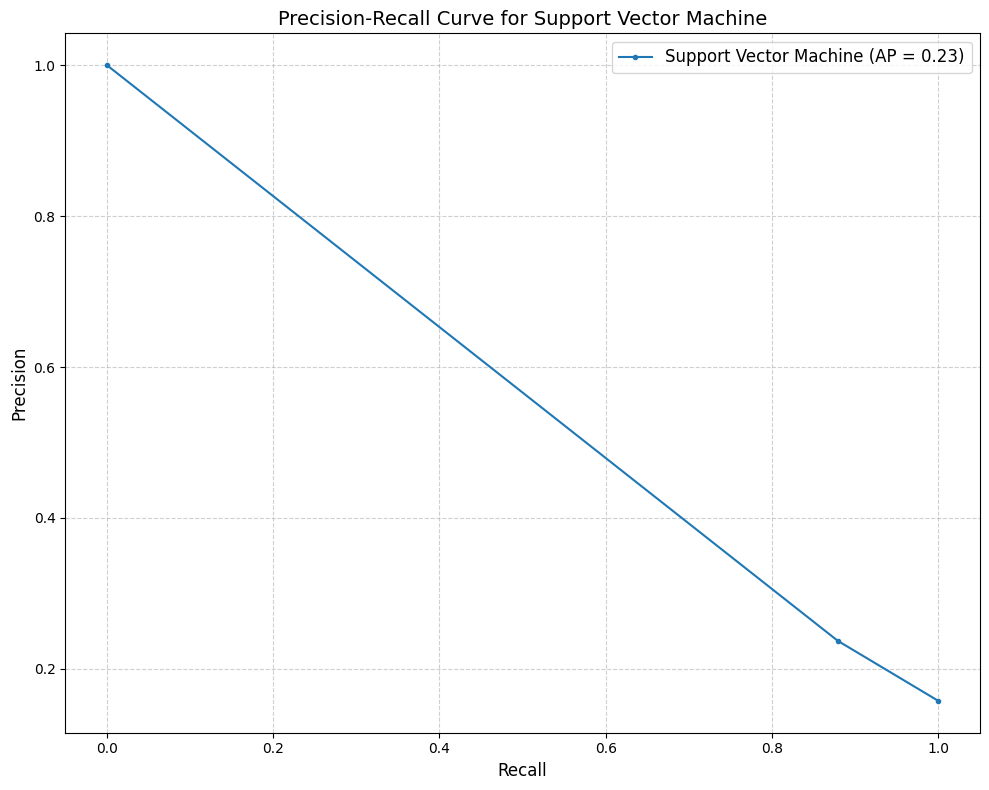

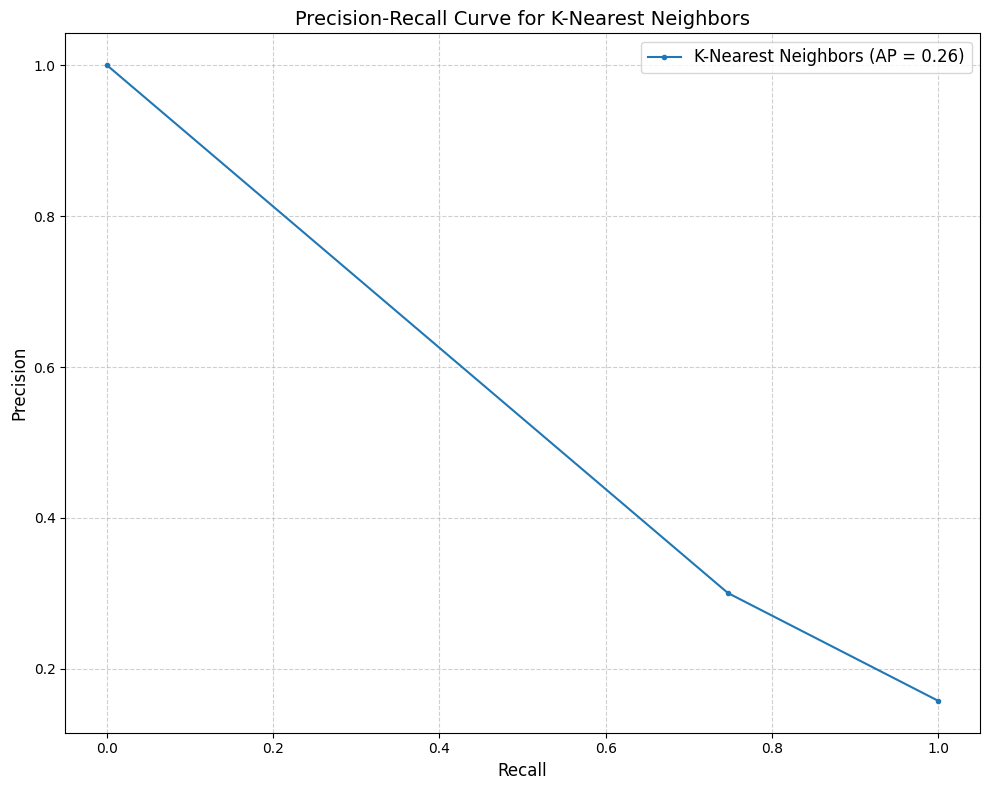

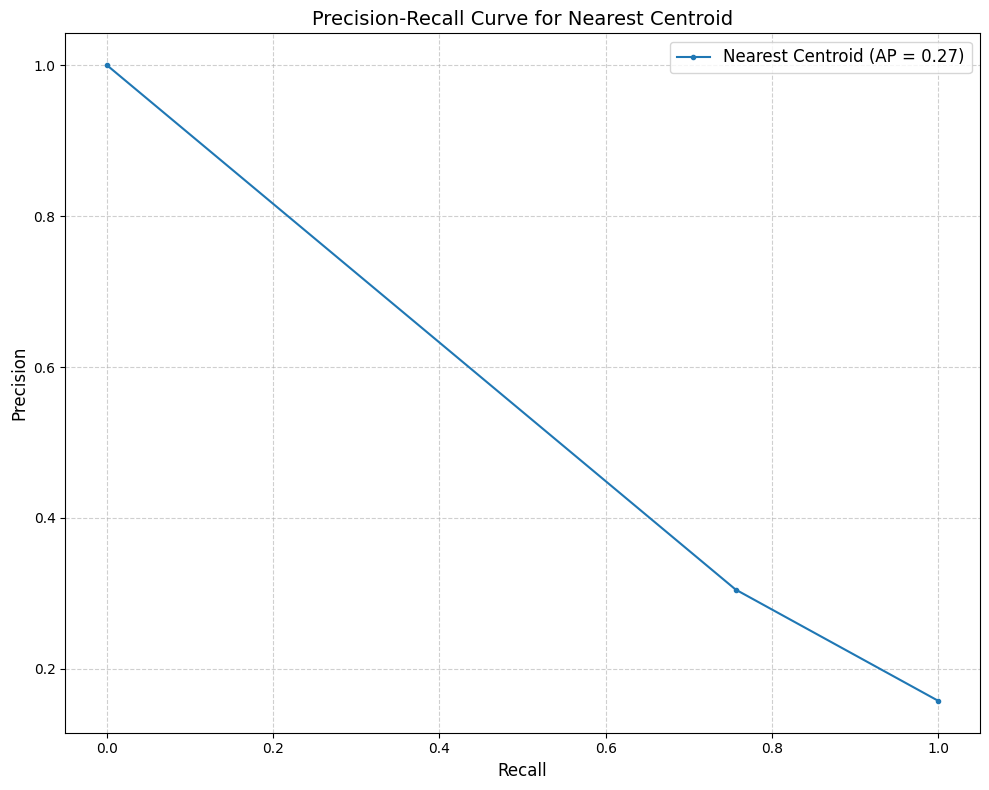

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

for model_name, model in model_dict.items():
    y_test_pred = model.predict(X_test)
    
    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
    average_precision = average_precision_score(y_test, y_test_pred)

    # Plot the precision-recall curve
    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AP = {average_precision:.2f})')
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6, linestyle='--')
    plt.tight_layout()
    plt.show()

### precision_recall_curve with predict_proba

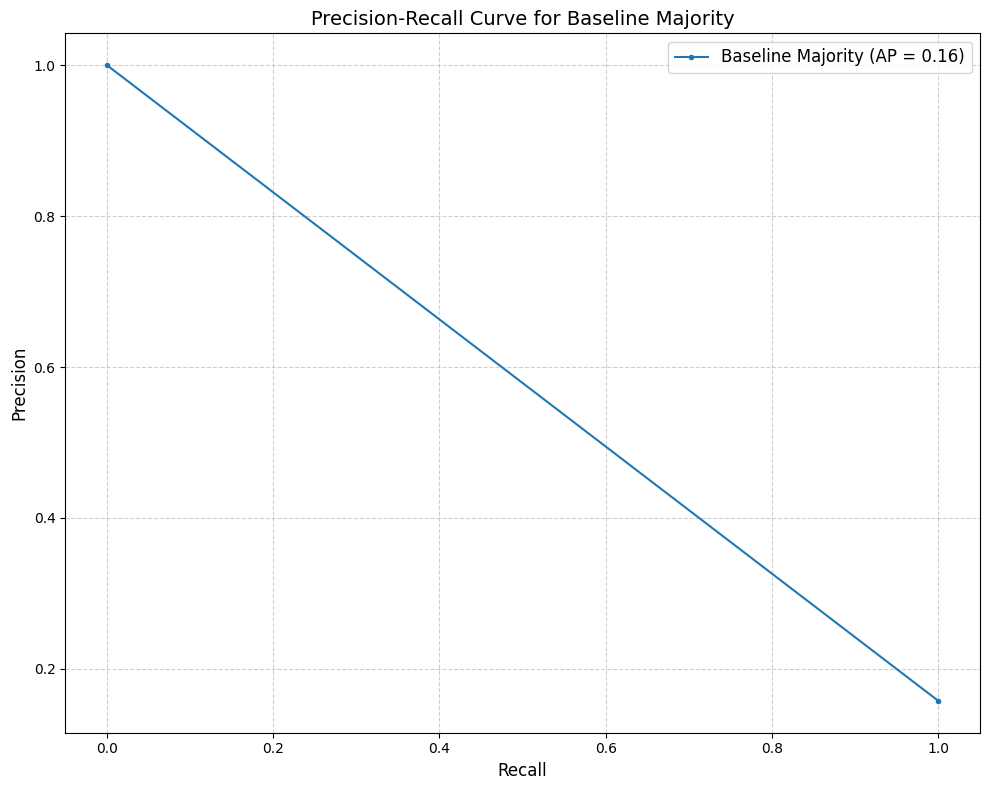

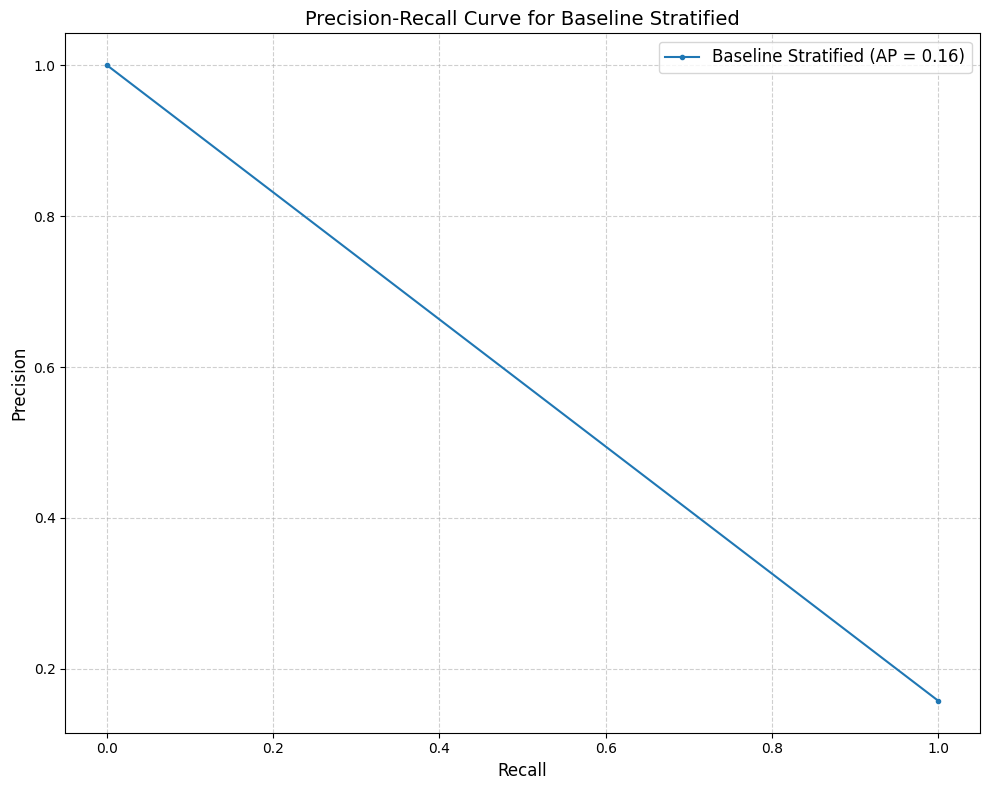

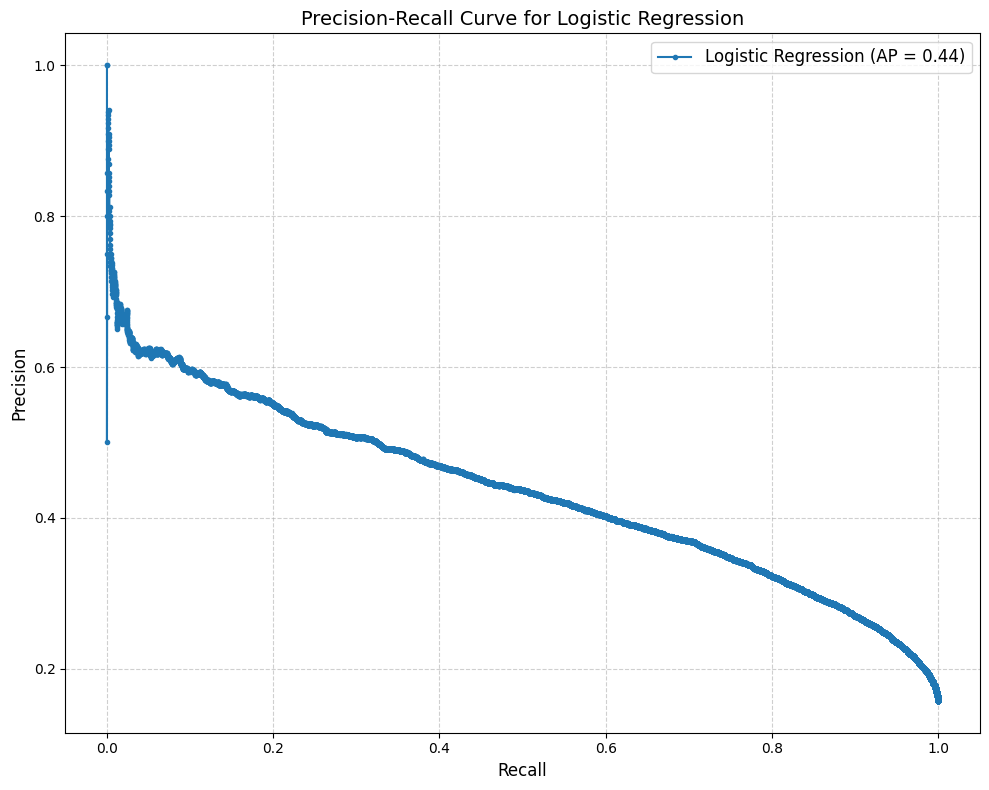

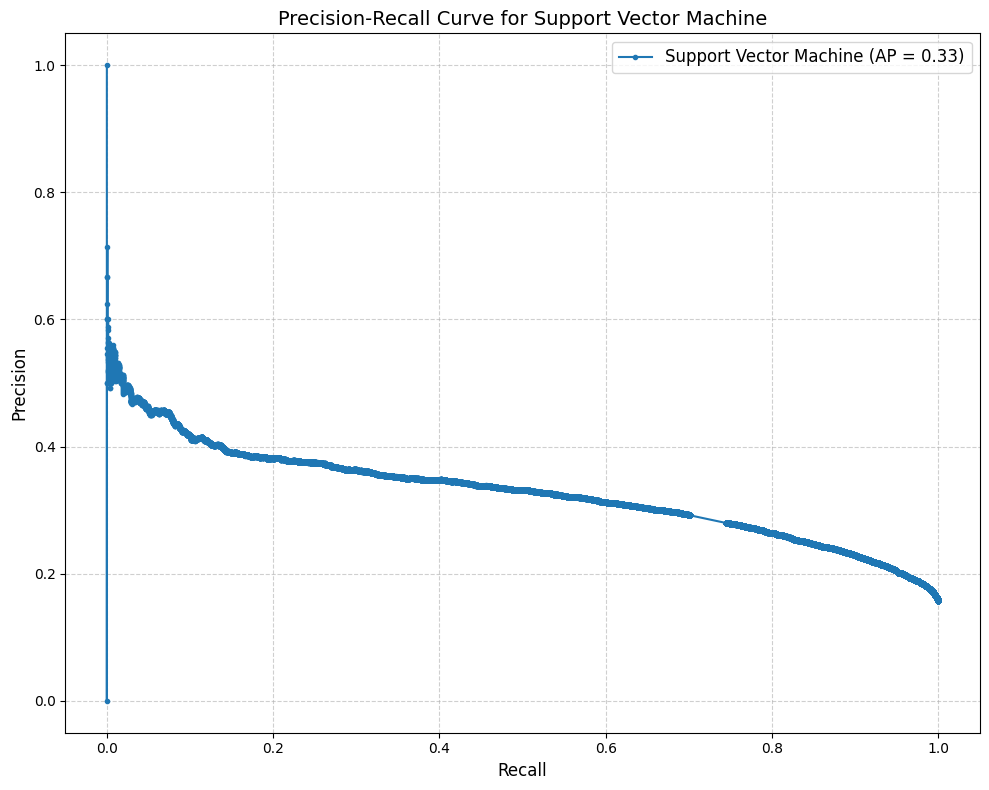

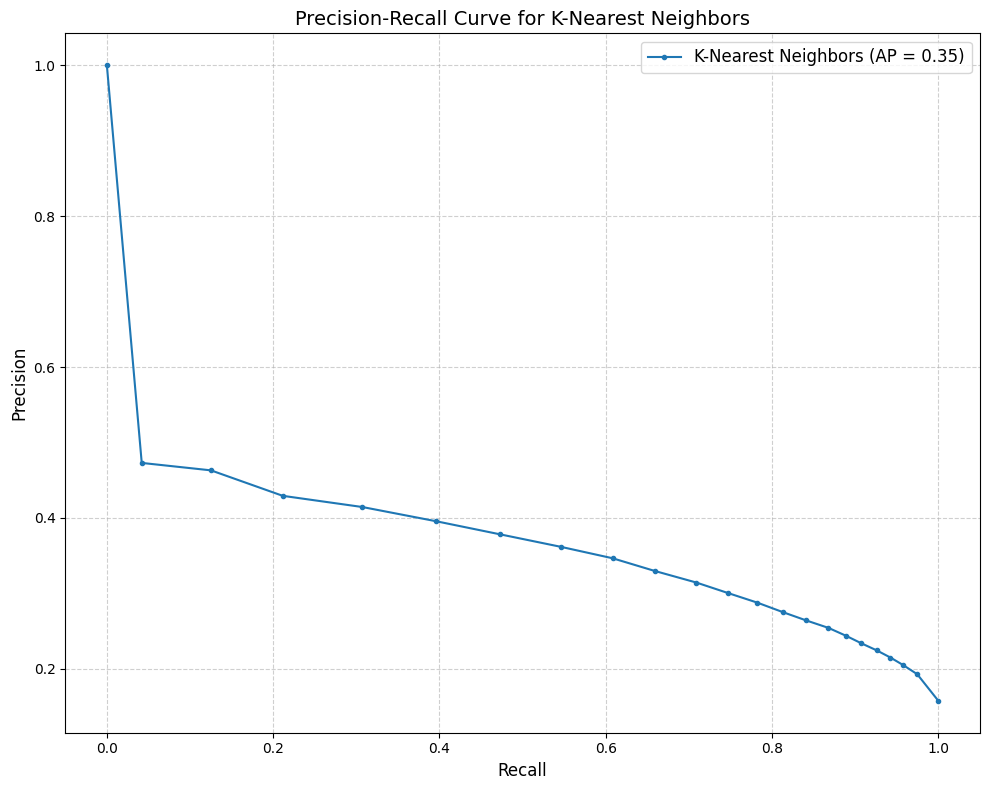

In [9]:
for model_name, model in model_dict.items():
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        try:
            y_test_proba = model.decision_function(X_test)
        except:
            continue
        
    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
    average_precision = average_precision_score(y_test, y_test_proba)

    # Plot the precision-recall curve
    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AP = {average_precision:.2f})')
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6, linestyle='--')
    plt.tight_layout()
    plt.show()


### PrecisionRecallDisplay.from_predictions with predicted values

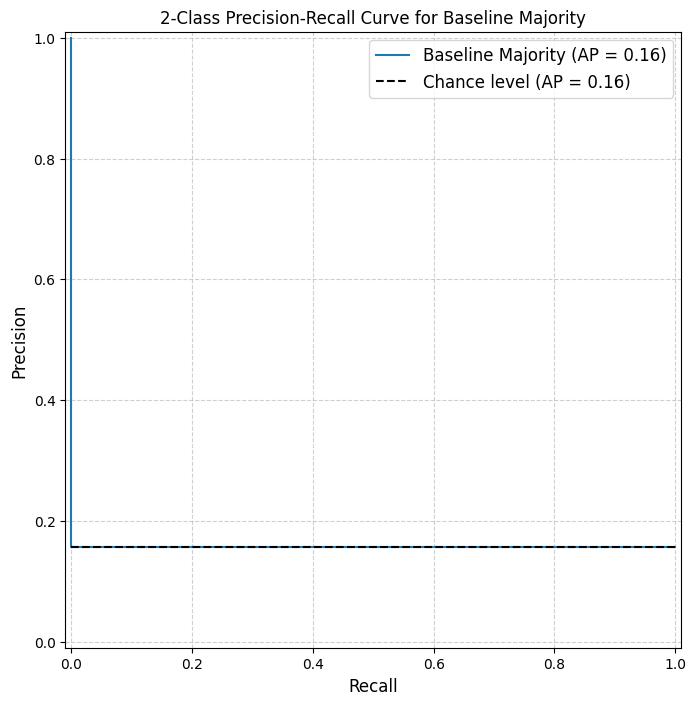

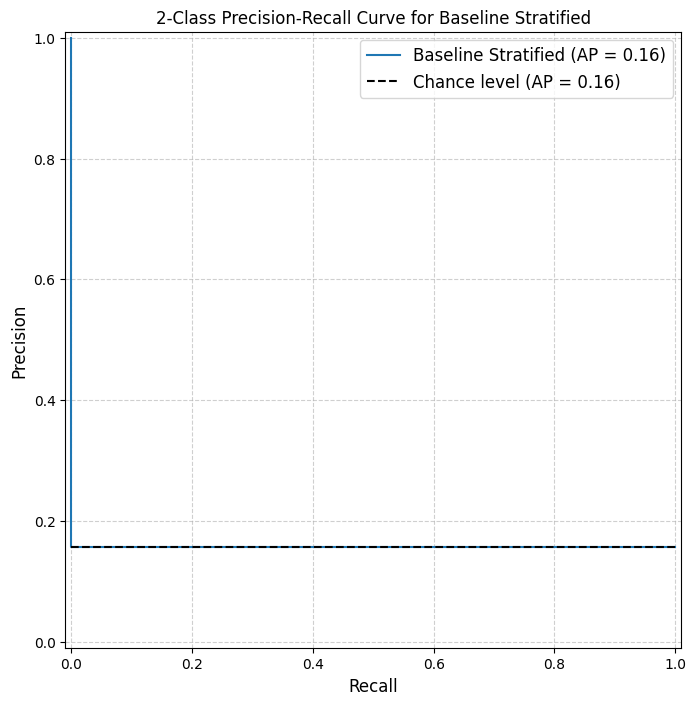

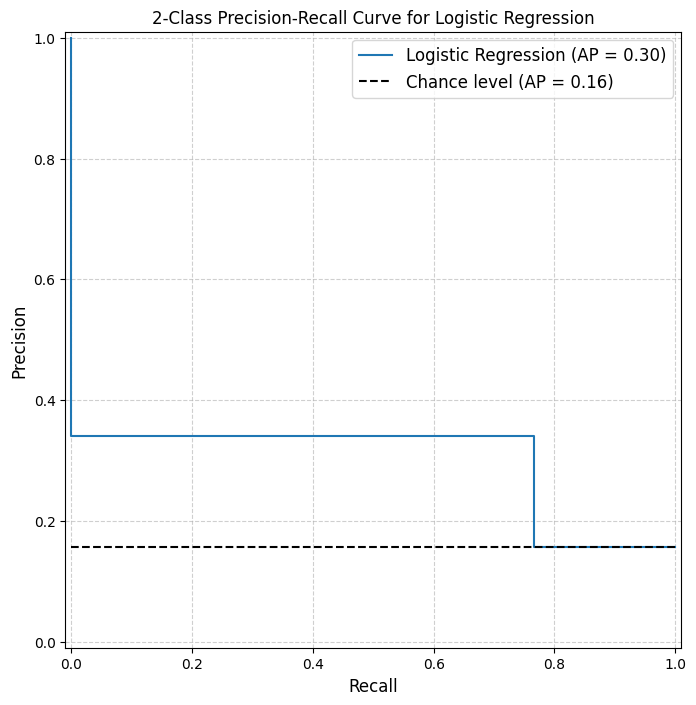

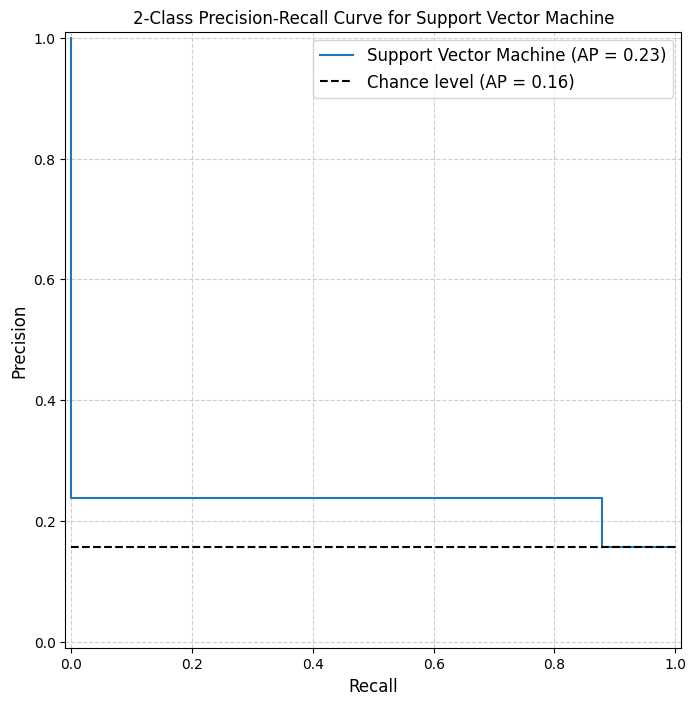

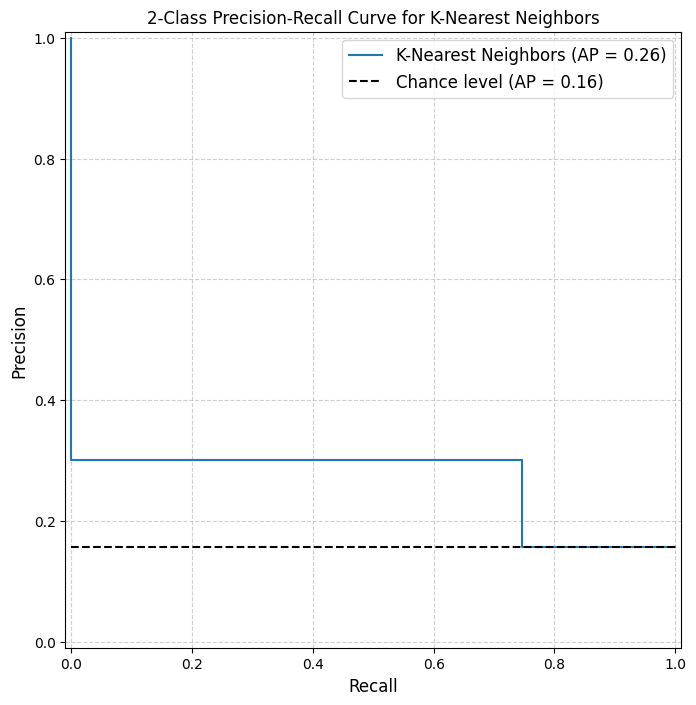

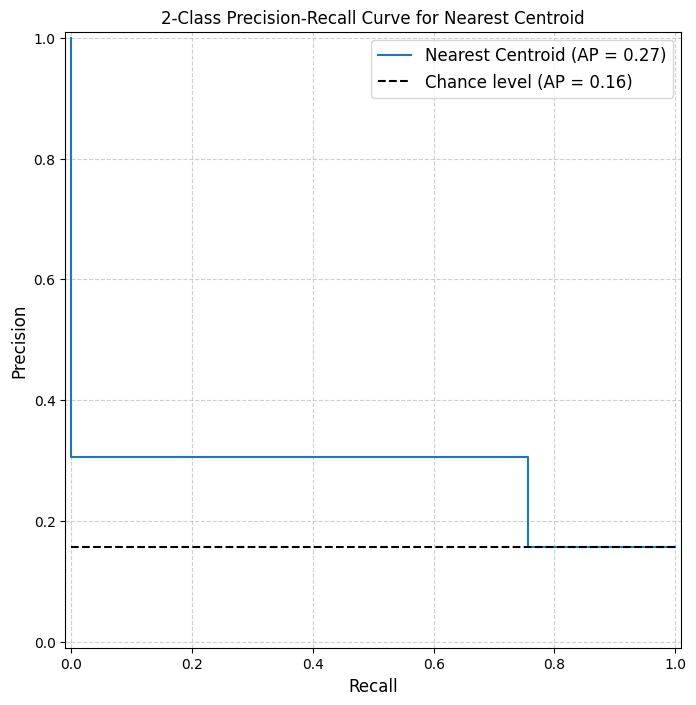

In [10]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
for model_name, model in model_dict.items():
    y_test_pred = model.predict(X_test)
    
    # Use PrecisionRecallDisplay for visualization
    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_test_pred,
        name=model_name,
        plot_chance_level=True  # Adds a baseline for random performance
    )

    # Customize the plot
    display.ax_.set_title(f"2-Class Precision-Recall Curve for {model_name}")
    display.ax_.grid(alpha=0.6, linestyle='--')  # Add grid
    display.ax_.set_xlabel('Recall', fontsize=12)
    display.ax_.set_ylabel('Precision', fontsize=12)
    display.figure_.set_size_inches(10, 8)  # Adjust figure size
    display.ax_.legend(fontsize=12)

    # Display the plot
    plt.show()

### PrecisionRecallDisplay.from_predictions with predict_proba

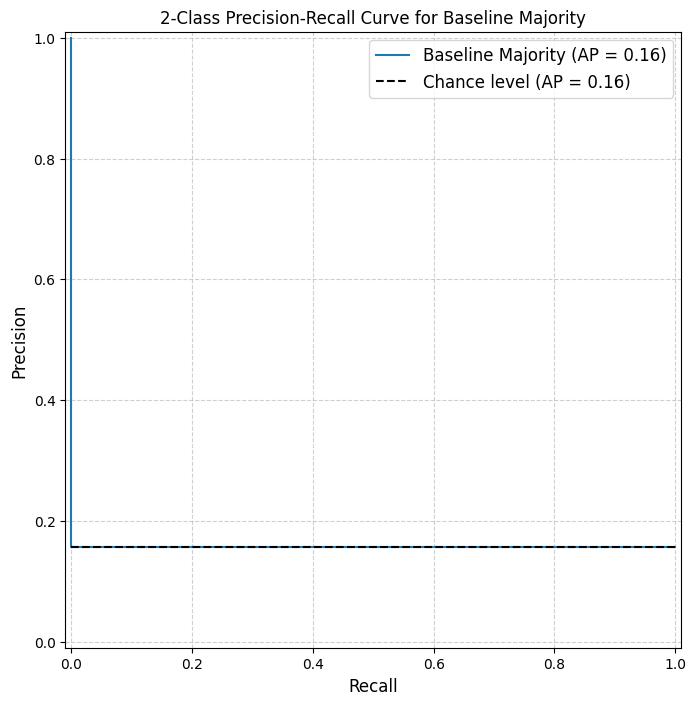

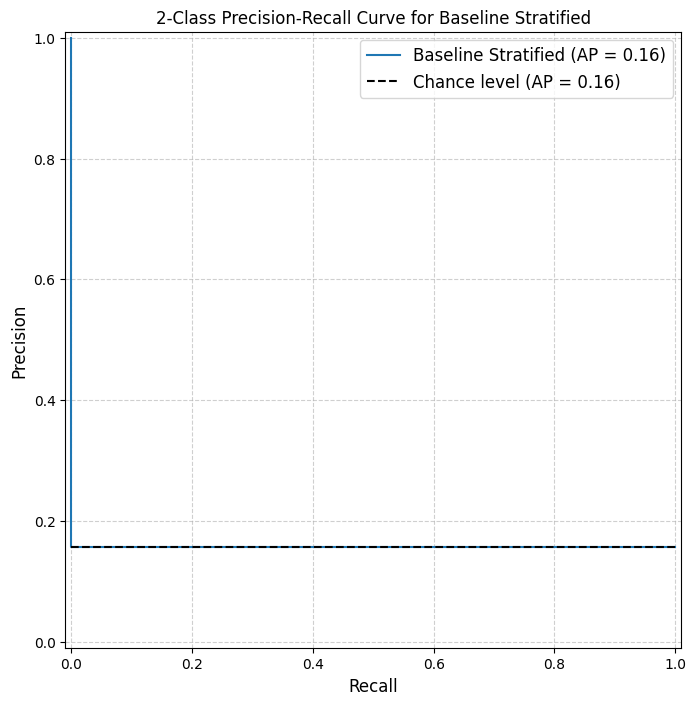

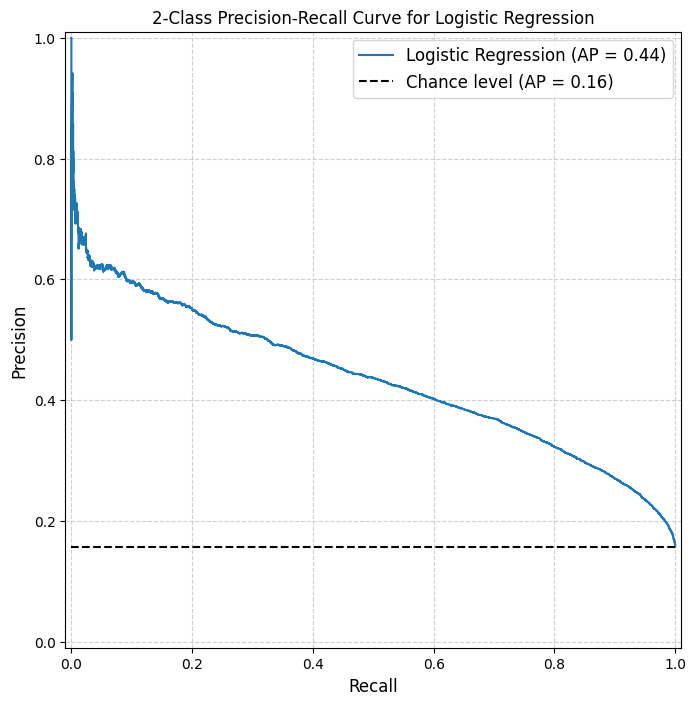

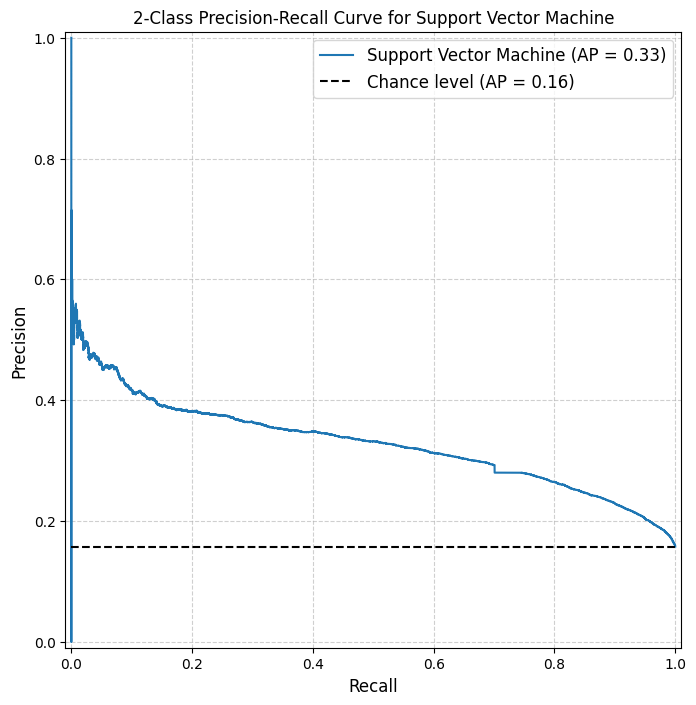

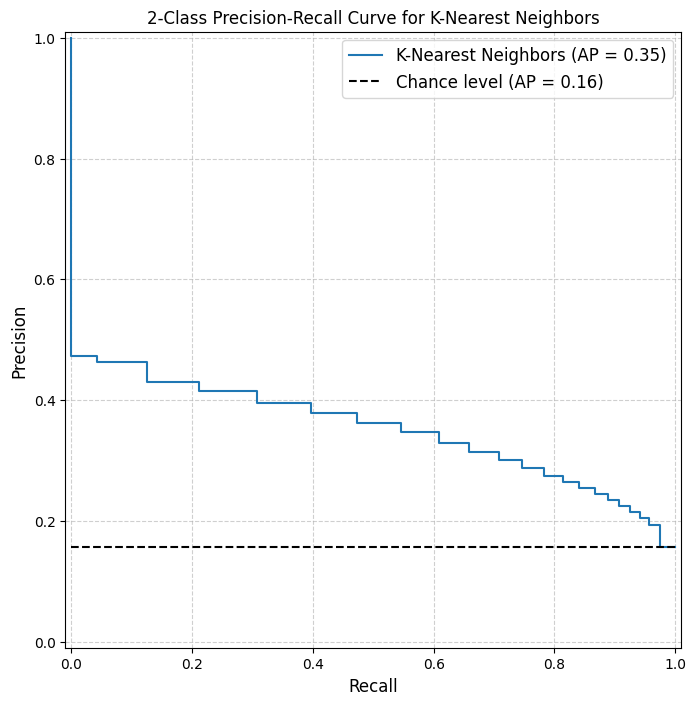

In [11]:
for model_name, model in model_dict.items():
    # Use predict_proba to get probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        try:
            y_test_proba = model.decision_function(X_test)
        except:
            continue
    
    # Use PrecisionRecallDisplay for visualization
    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_test_proba,  # Use probabilities instead of binary predictions
        name=model_name,
        plot_chance_level=True  # Adds a baseline for random performance
    )

    # Customize the plot
    display.ax_.set_title(f"2-Class Precision-Recall Curve for {model_name}")
    display.ax_.grid(alpha=0.6, linestyle='--')  # Add grid
    display.ax_.set_xlabel('Recall', fontsize=12)
    display.ax_.set_ylabel('Precision', fontsize=12)
    display.figure_.set_size_inches(10, 8)  # Adjust figure size
    display.ax_.legend(fontsize=12)

    # Display the plot
    plt.show()


## ROC Curve

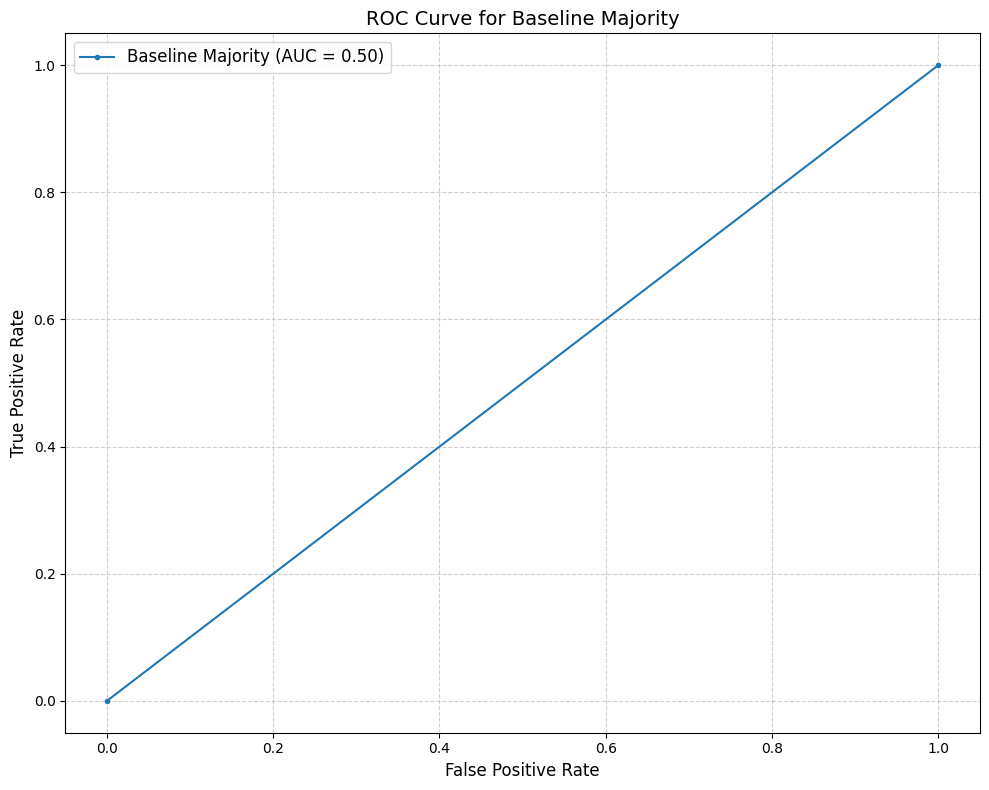

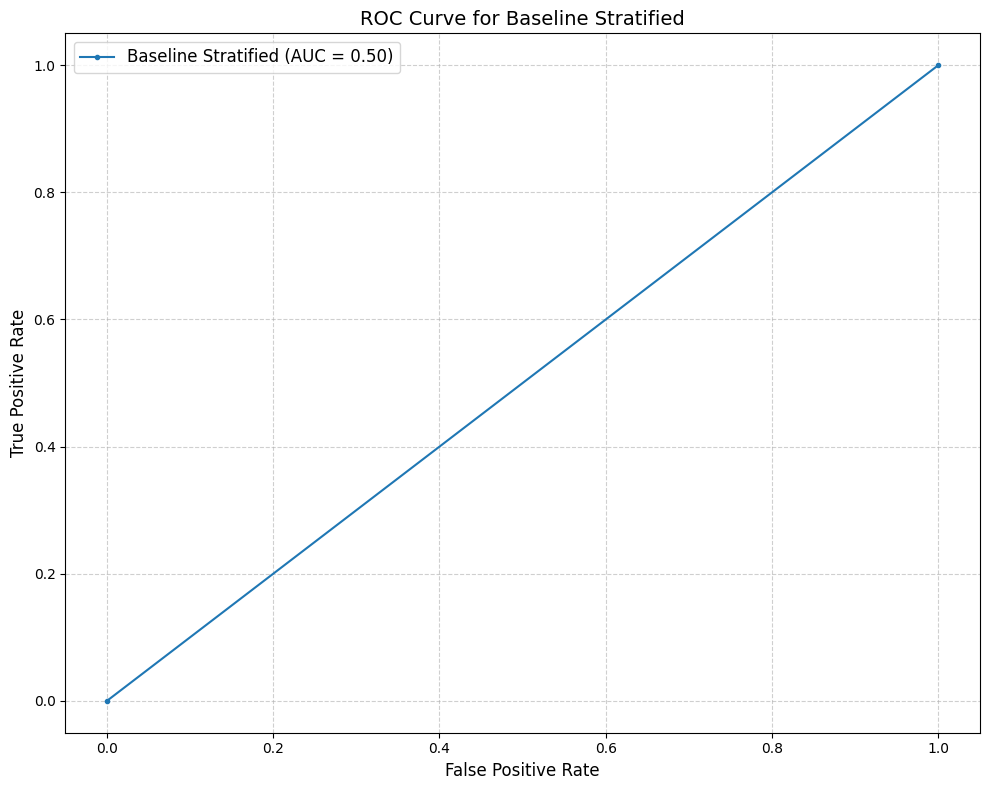

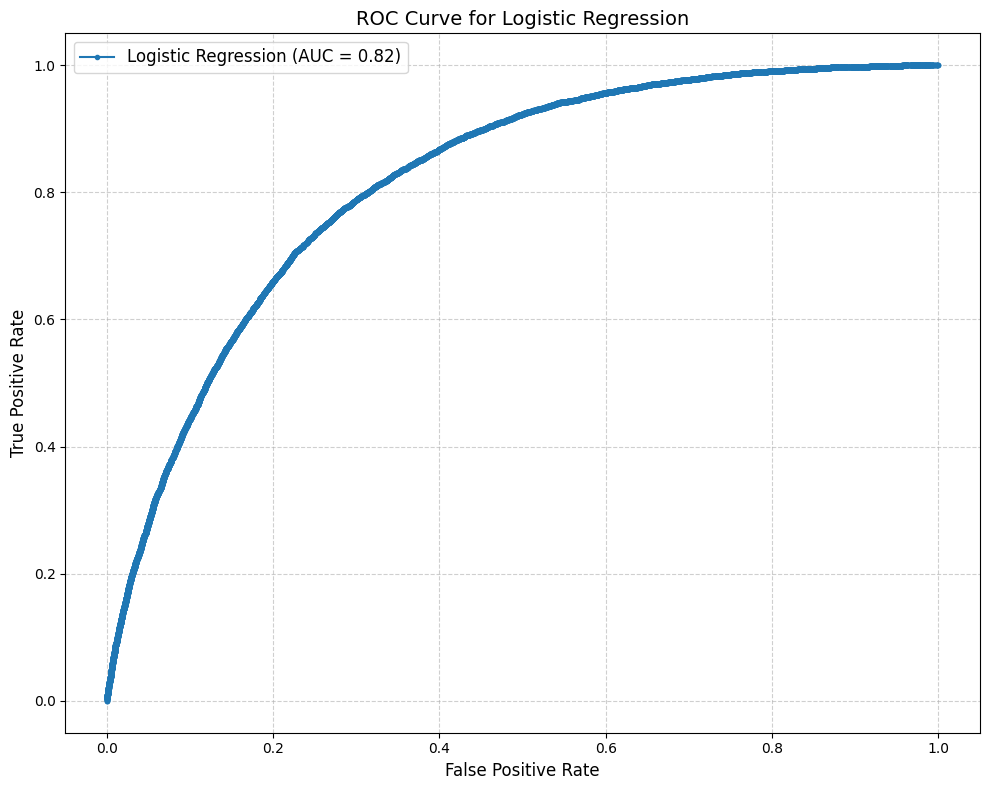

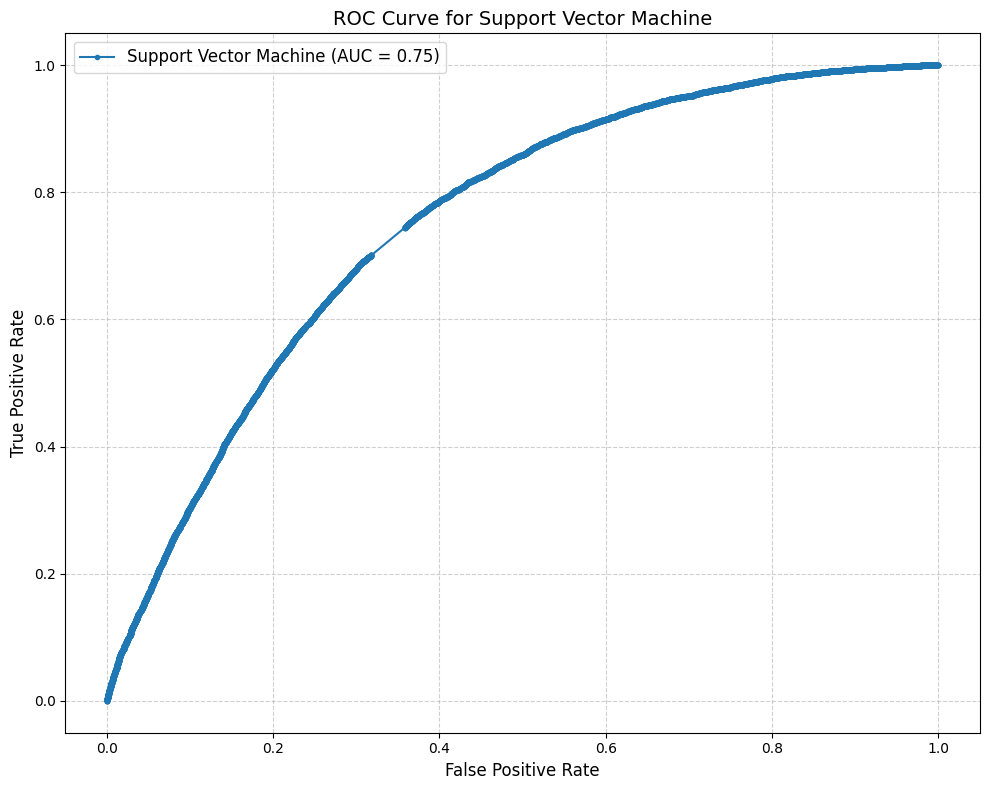

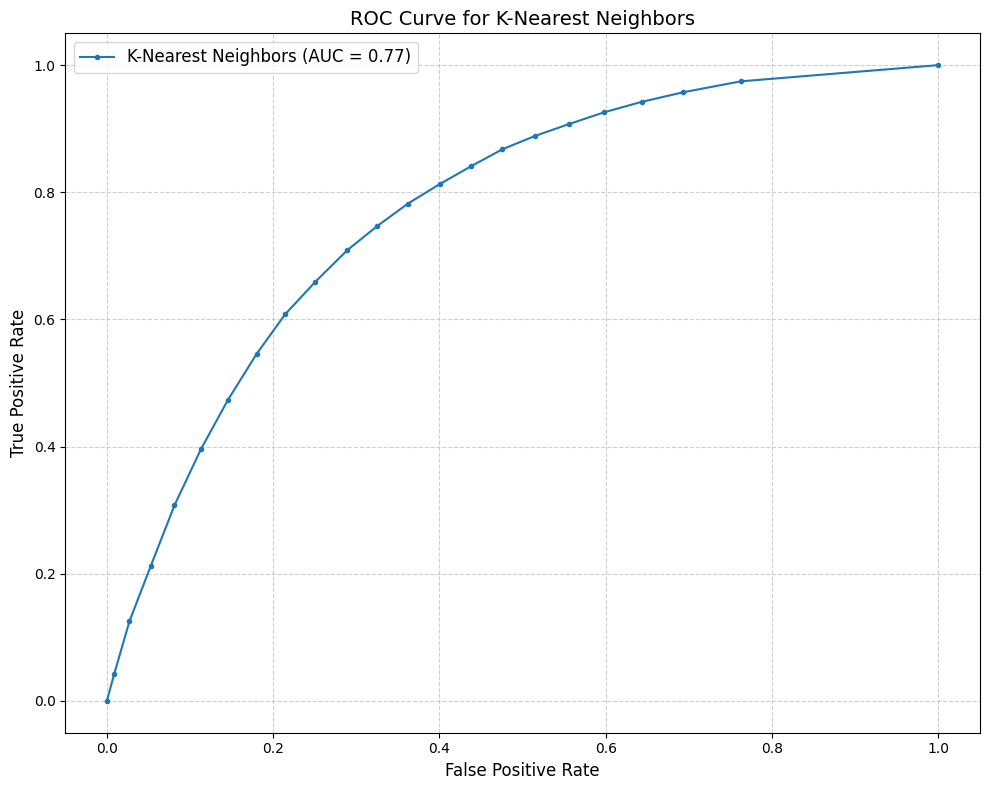

Model Nearest Centroid does not have predict_proba or decision_function method.


In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

for model_name, model in model_dict.items():
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        try:
            y_test_proba = model.decision_function(X_test)
        except AttributeError:
            print(f"Model {model_name} does not have predict_proba or decision_function method.")
            continue
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    # Plot the ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve for {model_name}', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6, linestyle='--')
    plt.tight_layout()
    plt.show()